In [13]:
import tifffile
import numpy as np
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

## Creating the Training Image Database

We create the training image database by extracting sub-volumes from a the original large images at a specific overlap.

### Loading the training image

In [15]:
#You have to have unzipped the tif image first.
img = tifffile.imread(r'C:\Users\qazxd\Desktop\GAN\data\berea\original\raw\berea.tif')
img1 = tifffile.imread(r'C:\Users\qazxd\Desktop\PorousMediaGan-master\data\berea\training_images\berea_0.tiff')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\qazxd\\Desktop\\PorousMediaGan-master\\data\\berea\\training_images\\berea_0.tiff'

In [10]:
#img.shape
img1.shape

(22, 20, 20)

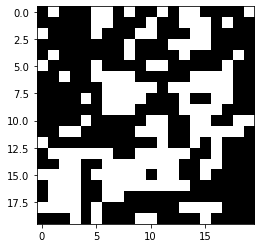

In [12]:
#Let's plot the typical image size so we can get an idea how big the images will be.
#plt.imshow(img[50,0:64, 0:64], cmap="Greys")
plt.imshow(img1[0,:,:],cmap='Greys')

In [ ]:
count = 0

edge_length = 64 #image dimensions
stride = 32 #stride at which images are extracted

N = edge_length
M = edge_length
O = edge_length

I_inc = stride
J_inc = stride
K_inc = stride

#Have to have this directory to create dataset
target_direc = "../../../data/beadpack/training_images/beadpack_"
for i in range(0, img.shape[0], I_inc):
    for j in range(0, img.shape[1], J_inc):
        for k in range(0, img.shape[2], K_inc):
            subset = img[i:i+N, j:j+N, k:k+O]
            if subset.shape == (N, M, O):
                f = h5py.File(target_direc+str(count)+'.hdf5', 'w')
                f.create_dataset('data', data=subset, dtype='i8', compression='gzip')
                f.close()
                count += 1
print(count)